# Boston Housing Dataset
Objective: To build a linear regression model for the Boston Housing Dataset and evaluate the model performance. Data cleaning and EDA is included.

## Importing required Libraries

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Code to print more than one output on same console
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Load dataset
Import dataset from statsmodel library

In [ ]:
import statsmodels.api as sm

boston_data = sm.datasets.get_rdataset('Boston', package='MASS')
df = boston_data.data

In [ ]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

## Summary Statistics

In [ ]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Inferences
* Crime rates average is 3.6 with very low crime rates in 50% of towns and extreme high rates in other towns.
* At least 50% of Boston towns have no zoned lands for large lot.
* The mean of chas is 0.07, which means that most of the houses are not on riverside.

In [ ]:
df.keys()

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [ ]:
df.shape

(506, 14)

In [ ]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Label
The price of the house indicated by the variable medv, which is the label and the rest are the features based on which we will predict house price.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


* There are a total of 506 non-null observations in each of the columns. This indicates that there are no missing values in the data.
* Every column in this dataset is numeric in nature.

## Univariate Analysis

### Distribution of variables

<Figure size 700x400 with 0 Axes>

<Axes: xlabel='crim', ylabel='Count'>

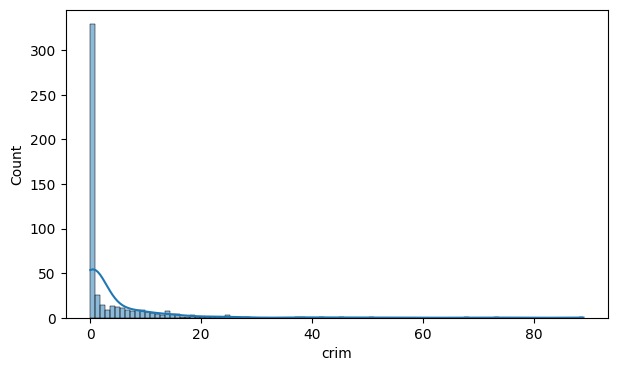

<Figure size 700x400 with 0 Axes>

<Axes: xlabel='zn', ylabel='Count'>

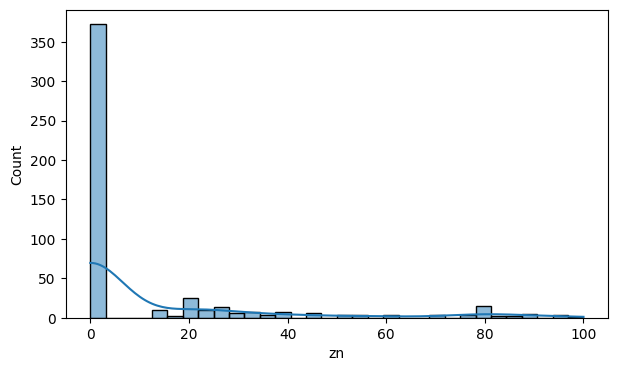

<Figure size 700x400 with 0 Axes>

<Axes: xlabel='indus', ylabel='Count'>

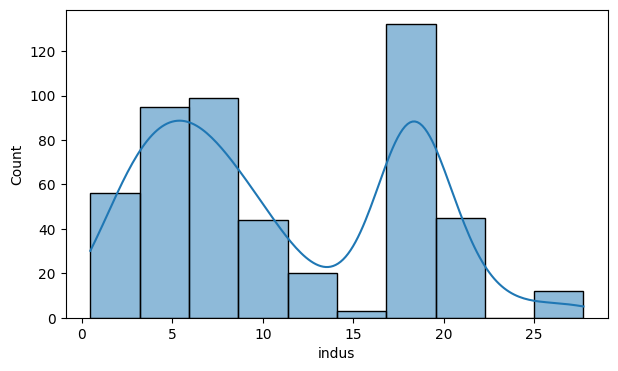

<Figure size 700x400 with 0 Axes>

<Axes: xlabel='chas', ylabel='Count'>

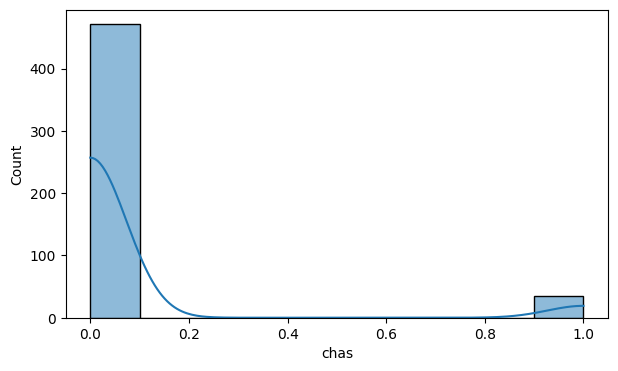

<Figure size 700x400 with 0 Axes>

<Axes: xlabel='nox', ylabel='Count'>

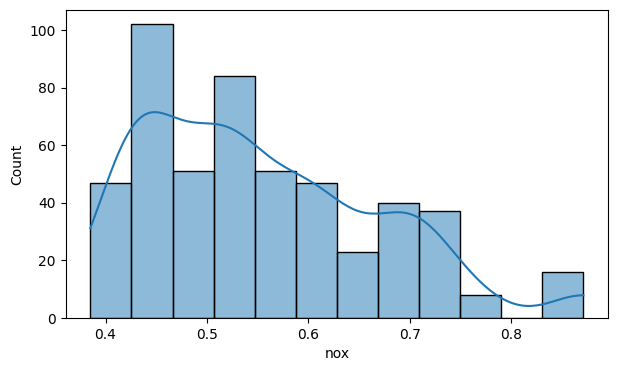

<Figure size 700x400 with 0 Axes>

<Axes: xlabel='rm', ylabel='Count'>

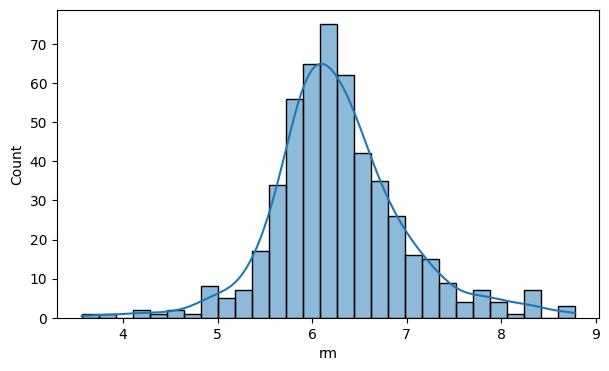

<Figure size 700x400 with 0 Axes>

<Axes: xlabel='age', ylabel='Count'>

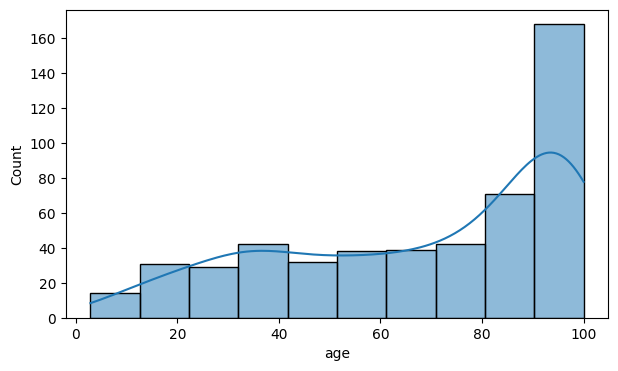

<Figure size 700x400 with 0 Axes>

<Axes: xlabel='dis', ylabel='Count'>

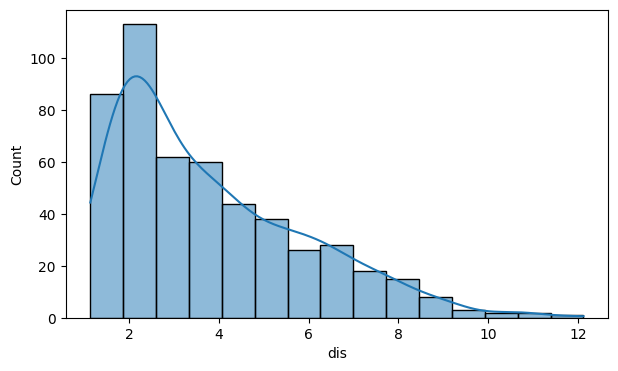

<Figure size 700x400 with 0 Axes>

<Axes: xlabel='rad', ylabel='Count'>

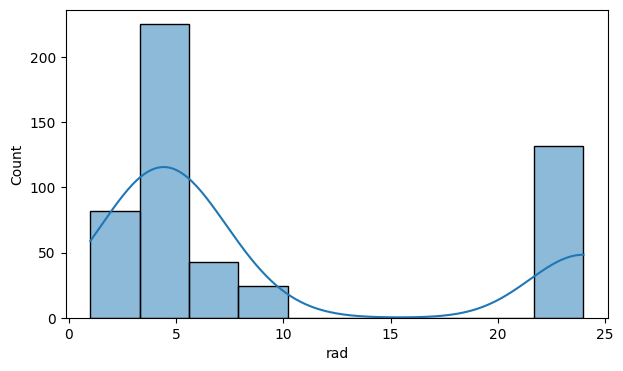

<Figure size 700x400 with 0 Axes>

<Axes: xlabel='tax', ylabel='Count'>

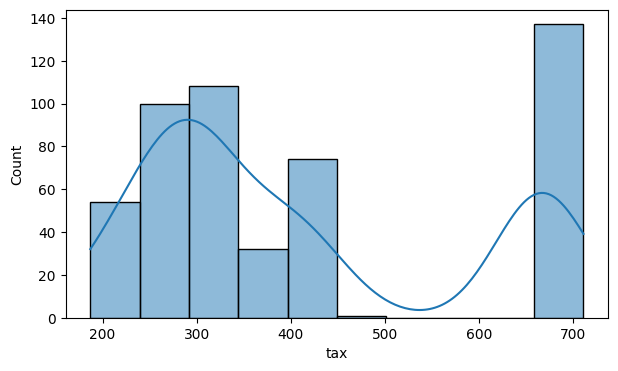

<Figure size 700x400 with 0 Axes>

<Axes: xlabel='ptratio', ylabel='Count'>

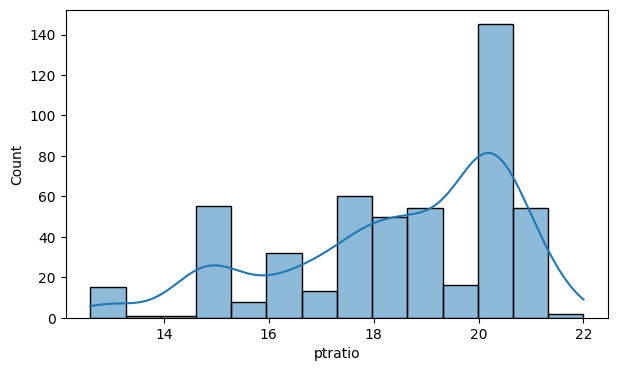

<Figure size 700x400 with 0 Axes>

<Axes: xlabel='black', ylabel='Count'>

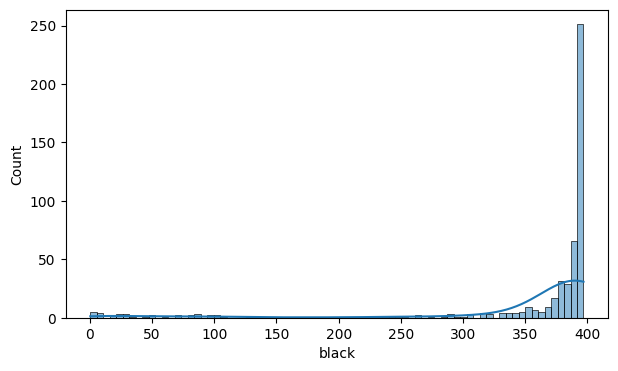

<Figure size 700x400 with 0 Axes>

<Axes: xlabel='lstat', ylabel='Count'>

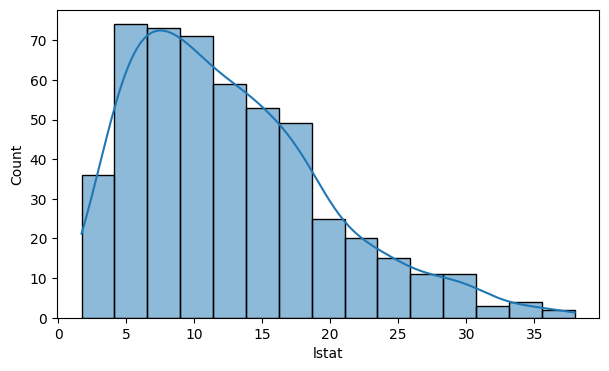

<Figure size 700x400 with 0 Axes>

<Axes: xlabel='medv', ylabel='Count'>

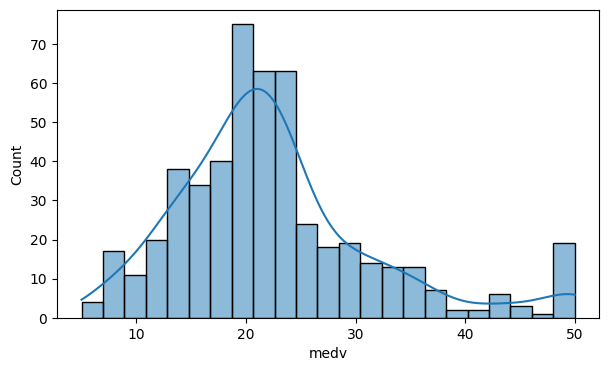

In [ ]:
# Plot all the column distributions
for i in df.columns:
    plt.figure(figsize=(7, 4))
    sns.histplot(data=df, x=i, kde = True)
    plt.show()

* The variables CRIM and ZN are positively skewed. This suggests that most of the areas have lower crime rates and most residential plots are under the area of 25,000 sq. ft.
* The variable CHAS, with only 2 possible values 0 and 1, follows a binomial distribution, and the majority of the houses are away from Charles river (CHAS = 0).
* The distribution of the variable AGE suggests that many of the owner-occupied houses were built before 1940.
* The variable DIS (average distances to five Boston employment centers) has a nearly exponential distribution, which indicates that most of the houses are closer to these employment centers.
* The variables TAX and RAD have a bimodal distribution., indicating that the tax rate is possibly higher for some properties which have a high index of accessibility to radial highways.
* The dependent variable MEDV seems to be slightly right skewed.

## Bivariate Analysis

### Correlation using heatmap

In [ ]:
x = df.corr()
x

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


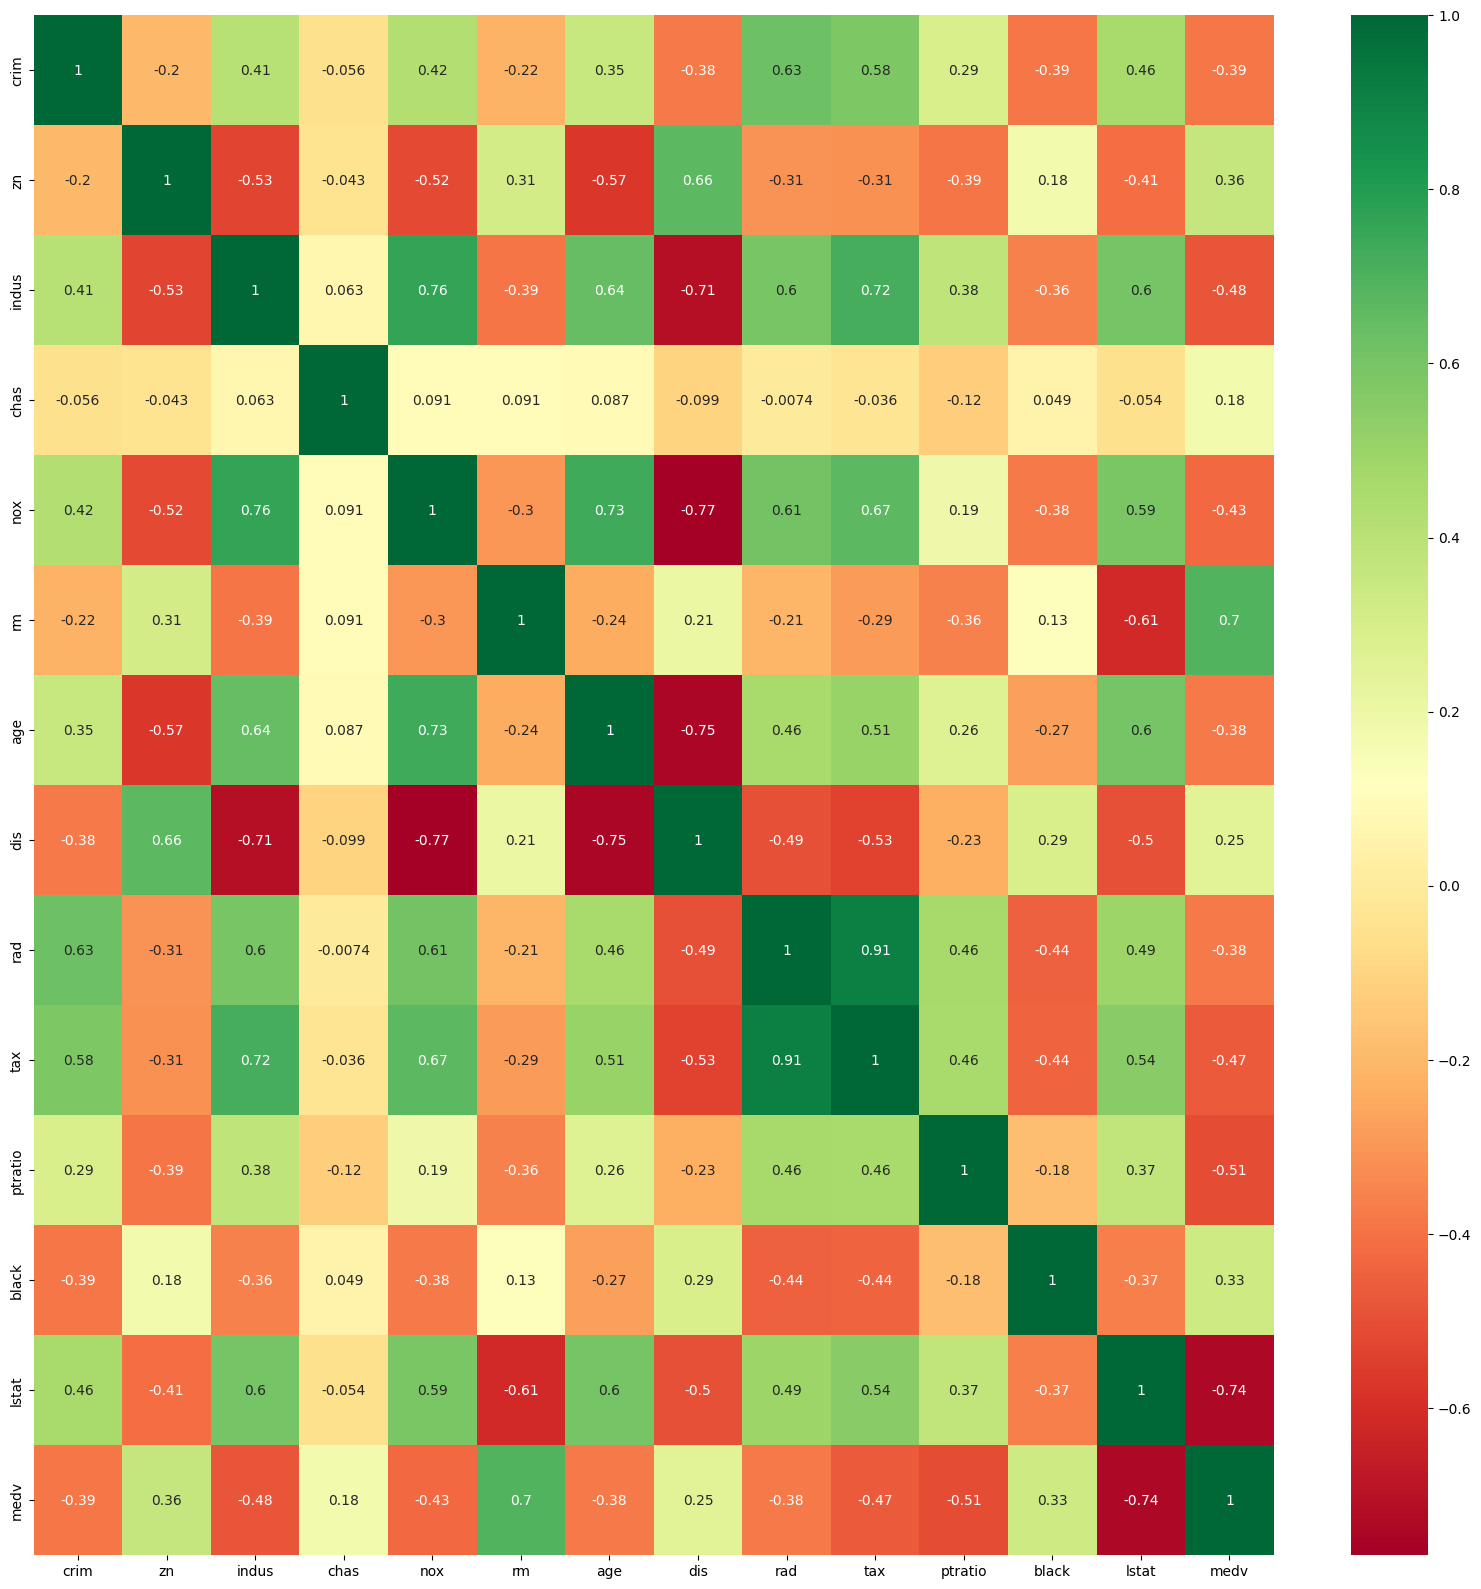

In [ ]:
plt.subplots(figsize=(20,20))
sns.heatmap(x, cmap = "RdYlGn", annot=True)
plt.show();

### Inferences:
* Proportion of non-retail business acres is positively correlated with oxide concentration. This implies town with high non-retail business areas have higher acids emissions. Could be a causation as well.
* Also, proportion of non-retail business acres is positively correlated with taxes. This implies that higher taxes are imposed on houses in town with high non-retail business areas.
* Number of rooms is positively correlated with house value, which makes sense.
* Oxide concentration is positively correlated with old owner-occupied buildings. This could transitively imply that old houses are more centered around non-retail business areas (which is positively correlated with oxid emissions).
* Distance from employeement centers is negatively correlated with propotion of non-retail business acres, oxide concentration, and proportion of owner-occupied buildings. This says towns away from employeement centers have more recent houses and less oxide concentration.
* Prices of houses is negatively correlated with low status of population which makes much sense.

## Model Building

### Split the dataset into features and labels

In [ ]:
x = df.drop('medv', axis = 1)
y = df['medv']
x.head()
y.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

### Create train and test data sets with 75% train to 25% test ratio

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25, random_state = 1)
train_x.shape
test_x.shape
train_y.shape
test_y.shape
# A series shape is represented as (379,), by default is has only 1 column, hence the column number will not be displayed
# By default, the split is 75-25%
# It helps to reproduce the train and test data set. However, in terms of accuracy there might be variations because of how the model fine tunes the parameters

(379, 13)

(127, 13)

(379,)

(127,)

### Instantiate Linear Regression instance

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression()

### Fit the model

In [ ]:
lm.fit(train_x, train_y)

LinearRegression()

### Predict

In [ ]:
predict_test = lm.predict(test_x)

In [ ]:
# Print the coefficient values for all the feature parameters in the model.
# Not necessarily the next step in the flow
print(lm.coef_)

[-1.14428903e-01  5.71299780e-02  3.83002824e-02  2.42854641e+00
 -2.12326236e+01  2.87723416e+00  6.91118094e-03 -1.47158266e+00
  3.05784197e-01 -1.06750361e-02 -9.96138270e-01  6.27746234e-03
 -5.57414427e-01]


In [ ]:
df_m = pd.DataFrame({'features':x.columns, 'coeff':lm.coef_})
df_m = df_m.sort_values(by=['coeff'])
df_m

,features,coeff
4,nox,-21.232624
7,dis,-1.471583
10,ptratio,-0.996138
12,lstat,-0.557414
0,crim,-0.114429
9,tax,-0.010675
11,black,0.006277
6,age,0.006911
2,indus,0.038300
1,zn,0.057130


###  Feature Importance bar chart

<Axes: xlabel='features'>

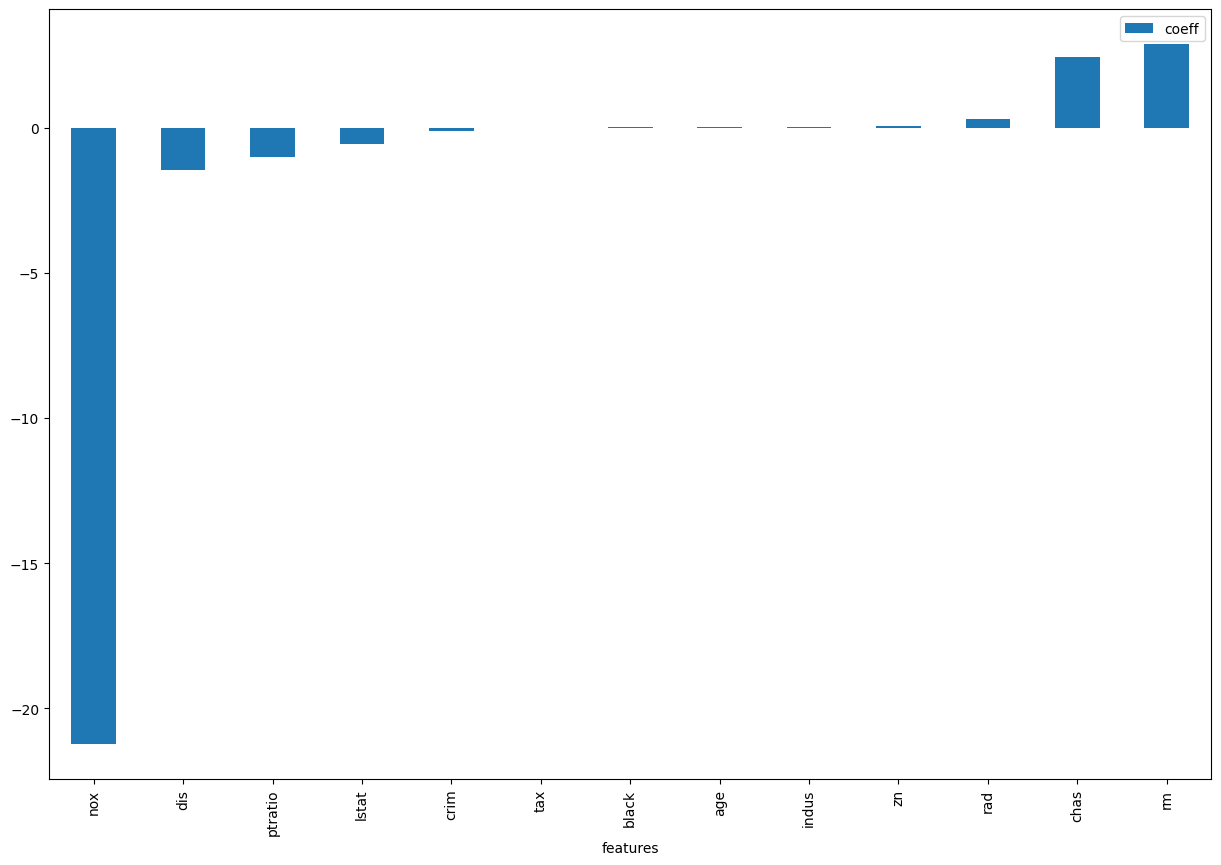

In [ ]:
df_m.plot(x='features', y='coeff', kind='bar', figsize=(15,10))
plt.show();

### Evaluate Model Performance with R2, MSE and MAE

In [ ]:
print("RSquare value for TEST data is -")
np.round(lm.score(test_x, test_y) * 100, 0)

print("\nRSquare value for TRAIN data is -")
np.round(lm.score(train_x, train_y) * 100, 0)

RSquare value for TEST data is -


78.0


RSquare value for TRAIN data is -


72.0

In [ ]:
from sklearn import metrics
print("Mean Square Error (MSE) for TEST data is")
np.round(metrics.mean_squared_error(test_y, predict_test), 0)

Mean Square Error (MSE) for TEST data is


22.0

In [ ]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error (MAE) for TEST data is")
np.round(mean_absolute_error(test_y, predict_test), 0)

Mean Absolute Error (MAE) for TEST data is


4.0

#### Appending the predicted house prices into the original data and computing the error in estimation for the test data.

In [ ]:
fdf = pd.concat([test_x, test_y], 1)
fdf['Predicted'] = np.round(predict_test, 1)
fdf['Prediction_Error'] = fdf['medv'] - fdf['Predicted']
fdf

<ipython-input-39-73242edc5c4a>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  fdf = pd.concat([test_x, test_y], 1)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,Predicted,Prediction_Error
307,0.04932,33.0,2.18,0,0.472,6.849,70.3,3.1827,7,222,18.4,396.90,7.53,28.2,32.4,-4.2
343,0.02543,55.0,3.78,0,0.484,6.696,56.4,5.7321,5,370,17.6,396.90,7.18,23.9,28.0,-4.1
47,0.22927,0.0,6.91,0,0.448,6.030,85.5,5.6894,3,233,17.9,392.74,18.80,16.6,18.1,-1.5
67,0.05789,12.5,6.07,0,0.409,5.878,21.4,6.4980,4,345,18.9,396.21,8.10,22.0,21.6,0.4
362,3.67822,0.0,18.10,0,0.770,5.362,96.2,2.1036,24,666,20.2,380.79,10.19,20.8,18.9,1.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,0.12744,0.0,6.91,0,0.448,6.770,2.9,5.7209,3,233,17.9,385.41,4.84,26.6,27.3,-0.7
361,3.83684,0.0,18.10,0,0.770,6.251,91.1,2.2955,24,666,20.2,350.65,14.19,19.9,18.7,1.2
289,0.04297,52.5,5.32,0,0.405,6.565,22.9,7.3172,6,293,16.6,371.72,9.51,24.8,27.3,-2.5
498,0.23912,0.0,9.69,0,0.585,6.019,65.3,2.4091,6,391,19.2,396.90,12.92,21.2,21.2,0.0
